DATASET

In [1]:
import urllib.request
import tarfile

# Download the data
url = "https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz"
filename = "rt-polaritydata.tar.gz"
urllib.request.urlretrieve(url, filename)

# Extract the tar.gz file
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()
print("Data downloaded and extracted successfully.")

Data downloaded and extracted successfully.


LOADING AND PREPARING DATASET

In [3]:
# Read positive and negative reviews
with open("rt-polaritydata/rt-polarity.pos", "r", encoding="latin-1") as pos_file:
    pos_reviews = pos_file.readlines()

with open("rt-polaritydata/rt-polarity.neg", "r", encoding="latin-1") as neg_file:
    neg_reviews = neg_file.readlines()

print(f"Review Count")
# Analyze the number of reviews
print(f"Number of positive reviews: {len(pos_reviews)}")
print(f"Number of negative reviews: {len(neg_reviews)}")

# Analyze the average length of reviews (in words)
pos_review_lengths = [len(review.split()) for review in pos_reviews]
neg_review_lengths = [len(review.split()) for review in neg_reviews]

avg_pos_length = sum(pos_review_lengths) / len(pos_review_lengths)
avg_neg_length = sum(neg_review_lengths) / len(neg_review_lengths)

print(f"\nAverage Review Length")
print(f"Average positive review length (in words): {avg_pos_length:.2f}")
print(f"Average negative review length (in words): {avg_neg_length:.2f}")
import pandas as pd

# Create a dataframe with reviews and their respective labels
data = pd.DataFrame({
    'review': pos_reviews + neg_reviews,
    'label': [1] * len(pos_reviews) + [0] * len(neg_reviews)  # 1 for positive, 0 for negative
})

Review Count
Number of positive reviews: 5331
Number of negative reviews: 5331

Average Review Length
Average positive review length (in words): 21.09
Average negative review length (in words): 20.94


SPLITTING TESTING AND TRAINING DATASET

In [4]:
# Create the training, validation, and test splits
train_pos = data[data['label'] == 1][:4000]
train_neg = data[data['label'] == 0][:4000]

valid_pos = data[data['label'] == 1][4000:4500]
valid_neg = data[data['label'] == 0][4000:4500]

test_pos = data[data['label'] == 1][4500:5331]
test_neg = data[data['label'] == 0][4500:5331]

# Combine positive and negative reviews for each set
train_data = pd.concat([train_pos, train_neg])
valid_data = pd.concat([valid_pos, valid_neg])
test_data = pd.concat([test_pos, test_neg])

# Shuffle each set
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
valid_data = valid_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the sizes of each set
print(f"Training set:")
print(f"Positive: {len(train_pos)}, Negative: {len(train_neg)}")\

print(f"\nValidation set:")
print(f"VPositive: {len(valid_pos)}, Negative: {len(valid_neg)}")

print(f"\nTest set size:")
print(f"Positive: {len(test_pos)}, Negative: {len(test_neg)}")


Training set:
Positive: 4000, Negative: 4000

Validation set:
VPositive: 500, Negative: 500

Test set size:
Positive: 831, Negative: 831


TEXT PROCESSING

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data for each split
X_train = vectorizer.fit_transform(train_data['review']).toarray()
X_valid = vectorizer.transform(valid_data['review']).toarray()
X_test = vectorizer.transform(test_data['review']).toarray()

# Extract labels for each split
y_train = train_data['label'].values
y_valid = valid_data['label'].values
y_test = test_data['label'].values

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_valid.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (8000, 5000)
Validation data shape: (1000, 5000)
Test data shape: (1662, 5000)


LOGISTIC REGRESSION

Validation Precision: 0.7859, Recall: 0.7340, F1-Score: 0.7590
Test Precision: 0.7389, Recall: 0.7425, F1-Score: 0.7407
True Positives: 617 
True Negatives: 613 
False Positives: 218 
False Negatives: 214

Classification Report for Logistic Rehression:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       831
           1       0.74      0.74      0.74       831

    accuracy                           0.74      1662
   macro avg       0.74      0.74      0.74      1662
weighted avg       0.74      0.74      0.74      1662



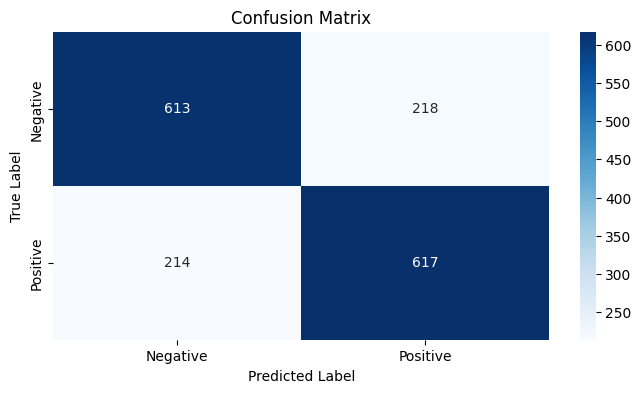

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
from sklearn.metrics import precision_score, recall_score, f1_score

# Validate the model
y_valid_pred = model.predict(X_valid)

# Print validation results
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)

print(f"Validation Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate precision, recall, and F1-score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print(f"Test Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN
tn, fp, fn, tp = conf_matrix.ravel()

# Print TP, TN, FP, FN
print(f"True Positives: {tp} \nTrue Negatives: {tn} \nFalse Positives: {fp} \nFalse Negatives: {fn}")
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report for Logistic Rehression:")
print(classification_report(y_test, y_test_pred))
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

RANDOM FOREST CLASSIFIER

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Validate the model
y_valid_pred_rf = rf_model.predict(X_valid)

# Calculate precision, recall, and F1-score for the validation set
precision_rf = precision_score(y_valid, y_valid_pred_rf)
recall_rf = recall_score(y_valid, y_valid_pred_rf)
f1_rf = f1_score(y_valid, y_valid_pred_rf)

print(f"Validation Precision (Random Forest): {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-Score: {f1_rf:.4f}")

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate precision, recall, and F1-score for the test set
precision_rf_test = precision_score(y_test, y_test_pred_rf)
recall_rf_test = recall_score(y_test, y_test_pred_rf)
f1_rf_test = f1_score(y_test, y_test_pred_rf)

print(f"Test Precision (Random Forest): {precision_rf_test:.4f}, Recall: {recall_rf_test:.4f}, F1-Score: {f1_rf_test:.4f}")


Validation Precision (Random Forest): 0.7432, Recall: 0.6540, F1-Score: 0.6957
Test Precision (Random Forest): 0.7163, Recall: 0.6594, F1-Score: 0.6867


SVM

In [8]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Validate the model
y_valid_pred_svm = svm_model.predict(X_valid)

# Calculate precision, recall, and F1-score for the validation set
precision_svm = precision_score(y_valid, y_valid_pred_svm)
recall_svm = recall_score(y_valid, y_valid_pred_svm)
f1_svm = f1_score(y_valid, y_valid_pred_svm)

print(f"Validation Precision (SVM): {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1-Score: {f1_svm:.4f}")

# Predict on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate precision, recall, and F1-score for the test set
precision_svm_test = precision_score(y_test, y_test_pred_svm)
recall_svm_test = recall_score(y_test, y_test_pred_svm)
f1_svm_test = f1_score(y_test, y_test_pred_svm)

print(f"Test Precision (SVM): {precision_svm_test:.4f}, Recall: {recall_svm_test:.4f}, F1-Score: {f1_svm_test:.4f}")


Validation Precision (SVM): 0.7868, Recall: 0.7380, F1-Score: 0.7616
Test Precision (SVM): 0.7334, Recall: 0.7316, F1-Score: 0.7325


MODEL COMPARISON

In [9]:
import numpy as np

# Collect test set results from all models
models = ['Logistic Regression', 'Random Forest', 'SVM']
precision_scores = [precision, precision_rf_test, precision_svm_test]
recall_scores = [recall, recall_rf_test, recall_svm_test]
f1_scores = [f1, f1_rf_test, f1_svm_test]

# Print the comparison in a table format
print(f"\n{'Model':<20}{'Precision':<15}{'Recall':<15}{'F1-Score':<15}")
for i in range(len(models)):
    print(f"{models[i]:<20}{precision_scores[i]:<15.4f}{recall_scores[i]:<15.4f}{f1_scores[i]:<15.4f}")



Model               Precision      Recall         F1-Score       
Logistic Regression 0.7389         0.7425         0.7407         
Random Forest       0.7163         0.6594         0.6867         
SVM                 0.7334         0.7316         0.7325         


CONFUSION MATRIX

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_test_pred)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_test_pred))

# Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

# SVM
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_test_pred_svm))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       831
           1       0.74      0.74      0.74       831

    accuracy                           0.74      1662
   macro avg       0.74      0.74      0.74      1662
weighted avg       0.74      0.74      0.74      1662


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       831
           1       0.72      0.66      0.69       831

    accuracy                           0.70      1662
   macro avg       0.70      0.70      0.70      1662
weighted avg       0.70      0.70      0.70      1662


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       831
           1       0.73      0.73      0.73       831

    accuracy                           0.73      1662
   mac

VISUALISATION OF CONFUSION MATRIX

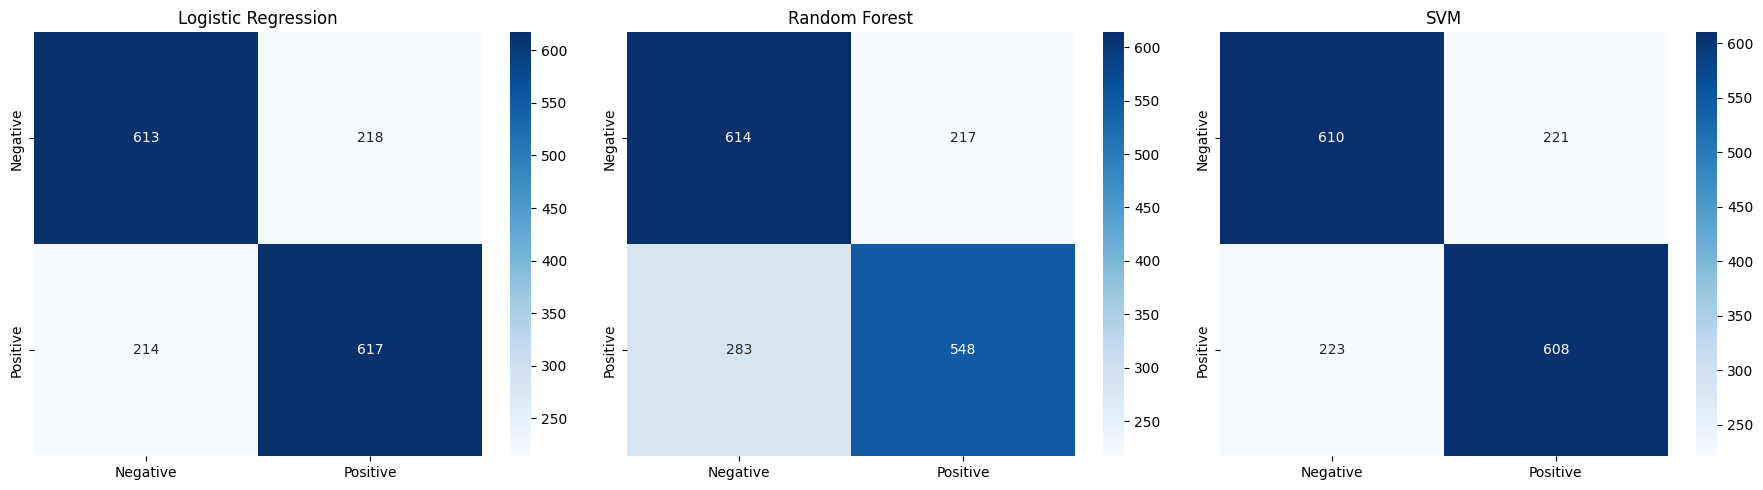

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrices for all models
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], ax=ax[0])
ax[0].set_title('Logistic Regression')

# Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], ax=ax[1])
ax[1].set_title('Random Forest')

# SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], ax=ax[2])
ax[2].set_title('SVM')

plt.tight_layout()
plt.show()
